# **Part 1: Classification**

## Libraries

In [1]:
#if (!require(Hmisc))  install.packages("Hmisc")
#if (!require(visdat)) install.packages("visdat")
if (!require(naniar))   install.packages("naniar")
if (!require(ggplot2)) {install.packages("tidyverse")
                        install.packages("ggplot2")}
if (!require(corrplot)) install.packages("corrplot")
if (!require(plyr))     install.packages("plyr")
if (!require(e1071))    install.packages ("e1071")  # For SVM
if (!require(rpart))    install.packages("rpart")   # For Decision Tree
if (!require(caret))    install.packages("caret")   # For train-test splitting
if (!require(caTools))  install.packages("caTools")
if (!require(rpart.plot)) install.packages("rpart.plot")
if (!require(keras)) install.packages("keras")


library(readr)
library(naniar)
library(RColorBrewer)
library(lubridate)
library(corrplot)
library(ggplot2)
library(plyr)
library(e1071)  # For SVM
library(rpart)  # For Decision Tree
library(caret)  # For train-test splitting
library(dplyr)
library(caTools)
library(rpart.plot)
library(knitr)
library(keras)


#library(party)
#library(partykit)
#library(Hmisc)
#library(visdat)
# Set the plot size

Loading required package: naniar

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘naniar’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Loading required package: ggplot2

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: plyr

Loading required package: e1071

Loading required package: rpart

Loading required package: caret

Loading required package: lattice

Loading required package: caTools

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no pack

In [2]:
rm(list = ls(all.names = TRUE))
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2446710,130.7,4373437,233.6,4373437,233.6
Vcells,4161036,31.8,8388608,64.0,8388160,64.0


## Read and View DataSet

In [4]:
# Upload, Read CSV file
#uploaded <- file.choose()
data <- read.csv("MedicalCentre.csv")
View(data)

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show
<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [5]:
#print  a summary of the data
summary(data)

   PatientId         AppointmentID        Gender          ScheduledDay      
 Min.   :3.920e+04   Min.   :5030230   Length:110527      Length:110527     
 1st Qu.:4.173e+12   1st Qu.:5640286   Class :character   Class :character  
 Median :3.173e+13   Median :5680573   Mode  :character   Mode  :character  
 Mean   :1.475e+14   Mean   :5675305                                        
 3rd Qu.:9.439e+13   3rd Qu.:5725524                                        
 Max.   :1.000e+15   Max.   :5790484                                        
                                                                            
 AppointmentDay          Age         Neighbourhood       Scholarship     
 Length:110527      Min.   : -1.00   Length:110527      Min.   :0.00000  
 Class :character   1st Qu.: 18.00   Class :character   1st Qu.:0.00000  
 Mode  :character   Median : 37.00   Mode  :character   Median :0.00000  
                    Mean   : 37.09                      Mean   :0.09827  
              

In [6]:
# Print the summary statistics
str(data)

'data.frame':	110527 obs. of  14 variables:
 $ PatientId     : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ AppointmentID : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ Gender        : chr  "F" "M" "F" "F" ...
 $ ScheduledDay  : chr  "2016-04-29T18:38:08Z" "2016-04-29T16:08:27Z" "2016-04-29T16:19:04Z" "2016-04-29T17:29:31Z" ...
 $ AppointmentDay: chr  "2016-04-29T00:00:00Z" "2016-04-29T00:00:00Z" "2016-04-29T00:00:00Z" "2016-04-29T00:00:00Z" ...
 $ Age           : int  62 56 62 8 56 76 23 39 21 19 ...
 $ Neighbourhood : chr  "JARDIM DA PENHA" "JARDIM DA PENHA" "MATA DA PRAIA" "PONTAL DE CAMBURI" ...
 $ Scholarship   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hipertension  : int  1 0 0 0 1 1 0 0 0 0 ...
 $ Diabetes      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show       : chr  "No" "No" "No" "No" ..

In [7]:
#Chaning the format of ScheduledDay/AppointmentDay < to DateTime-->POSIXct
data$ScheduledDay <- as.POSIXct(data$ScheduledDay, format = "%Y-%m-%dT%H:%M:%SZ")
data$AppointmentDay <- as.POSIXct(data$AppointmentDay,format = "%Y-%m-%dT%H:%M:%SZ")

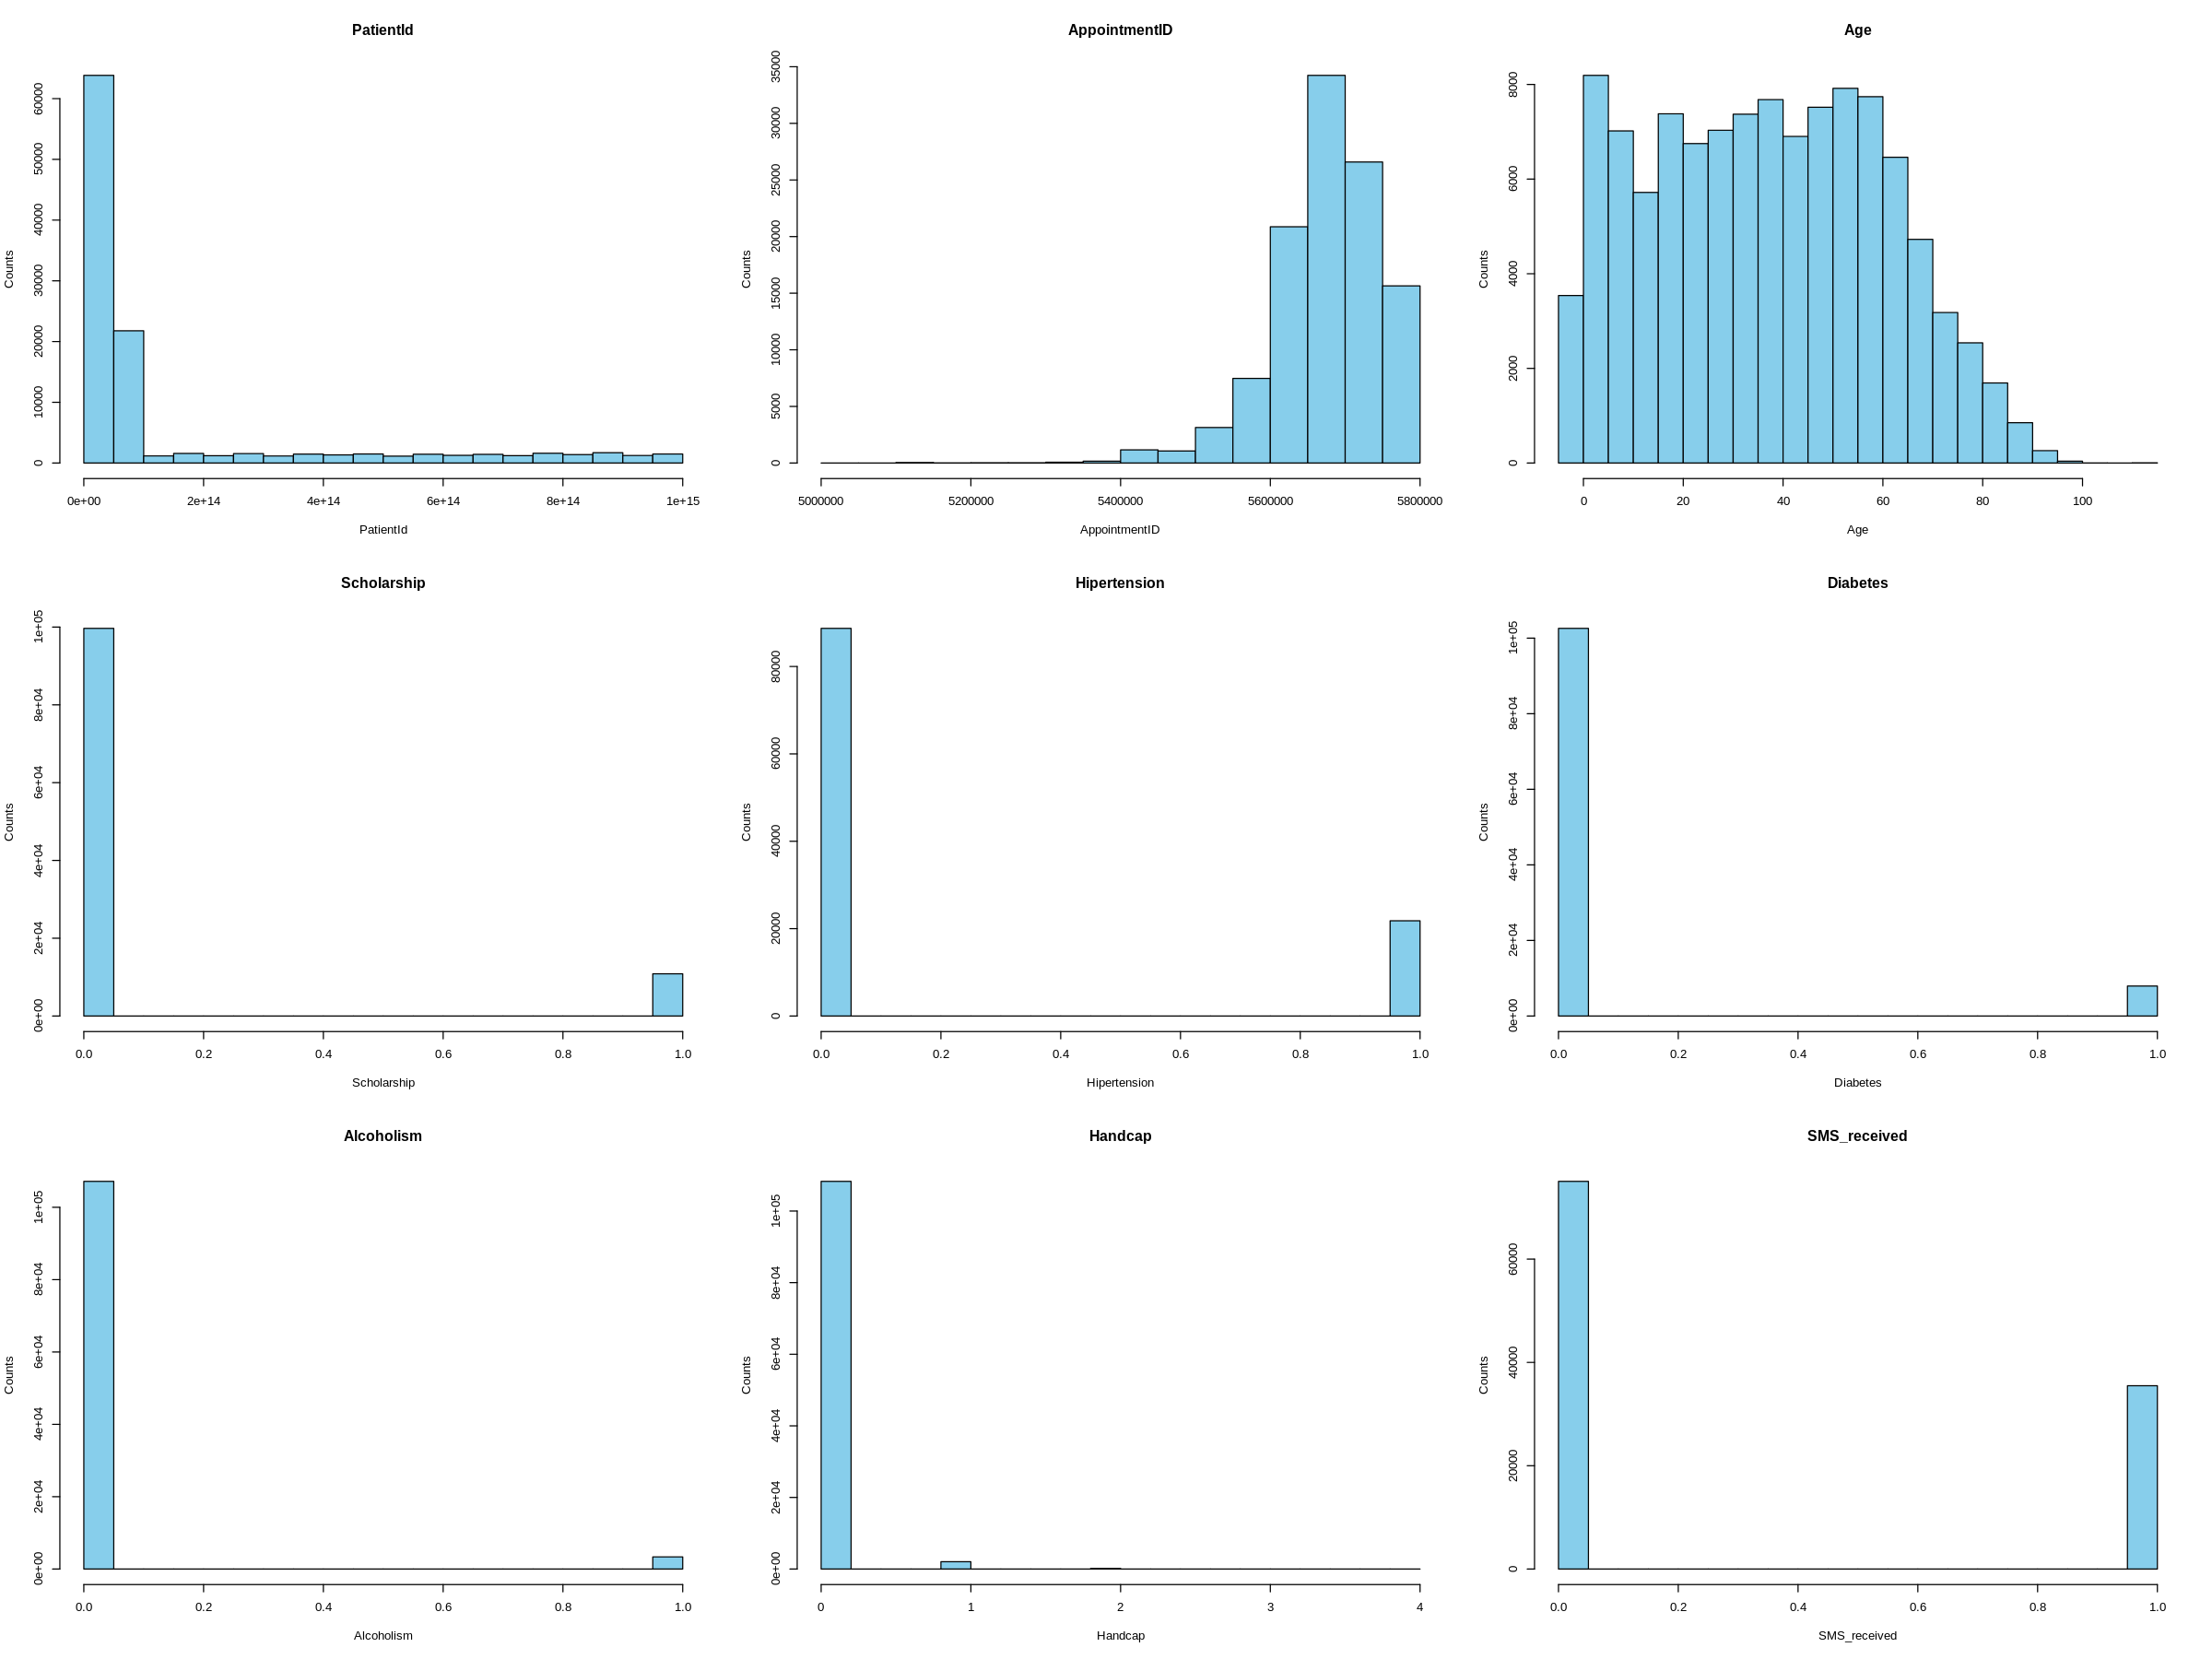

In [8]:
options(repr.plot.width = 20, repr.plot.height = 15)  # Set the width and height as desired

numeric_data <- data[, sapply(data, is.numeric)]

par(mfrow = c(ceiling(ncol(numeric_data) / 3), 3))
# Iterate over each column and plot a histogram with color
for (col in colnames(numeric_data)) {
  hist(data[[col]], main = col, xlab = col, ylab = "Counts", col = "skyblue")  # Set the desired color
}

# Reset the plot settings
par(mfrow = c(1, 1))


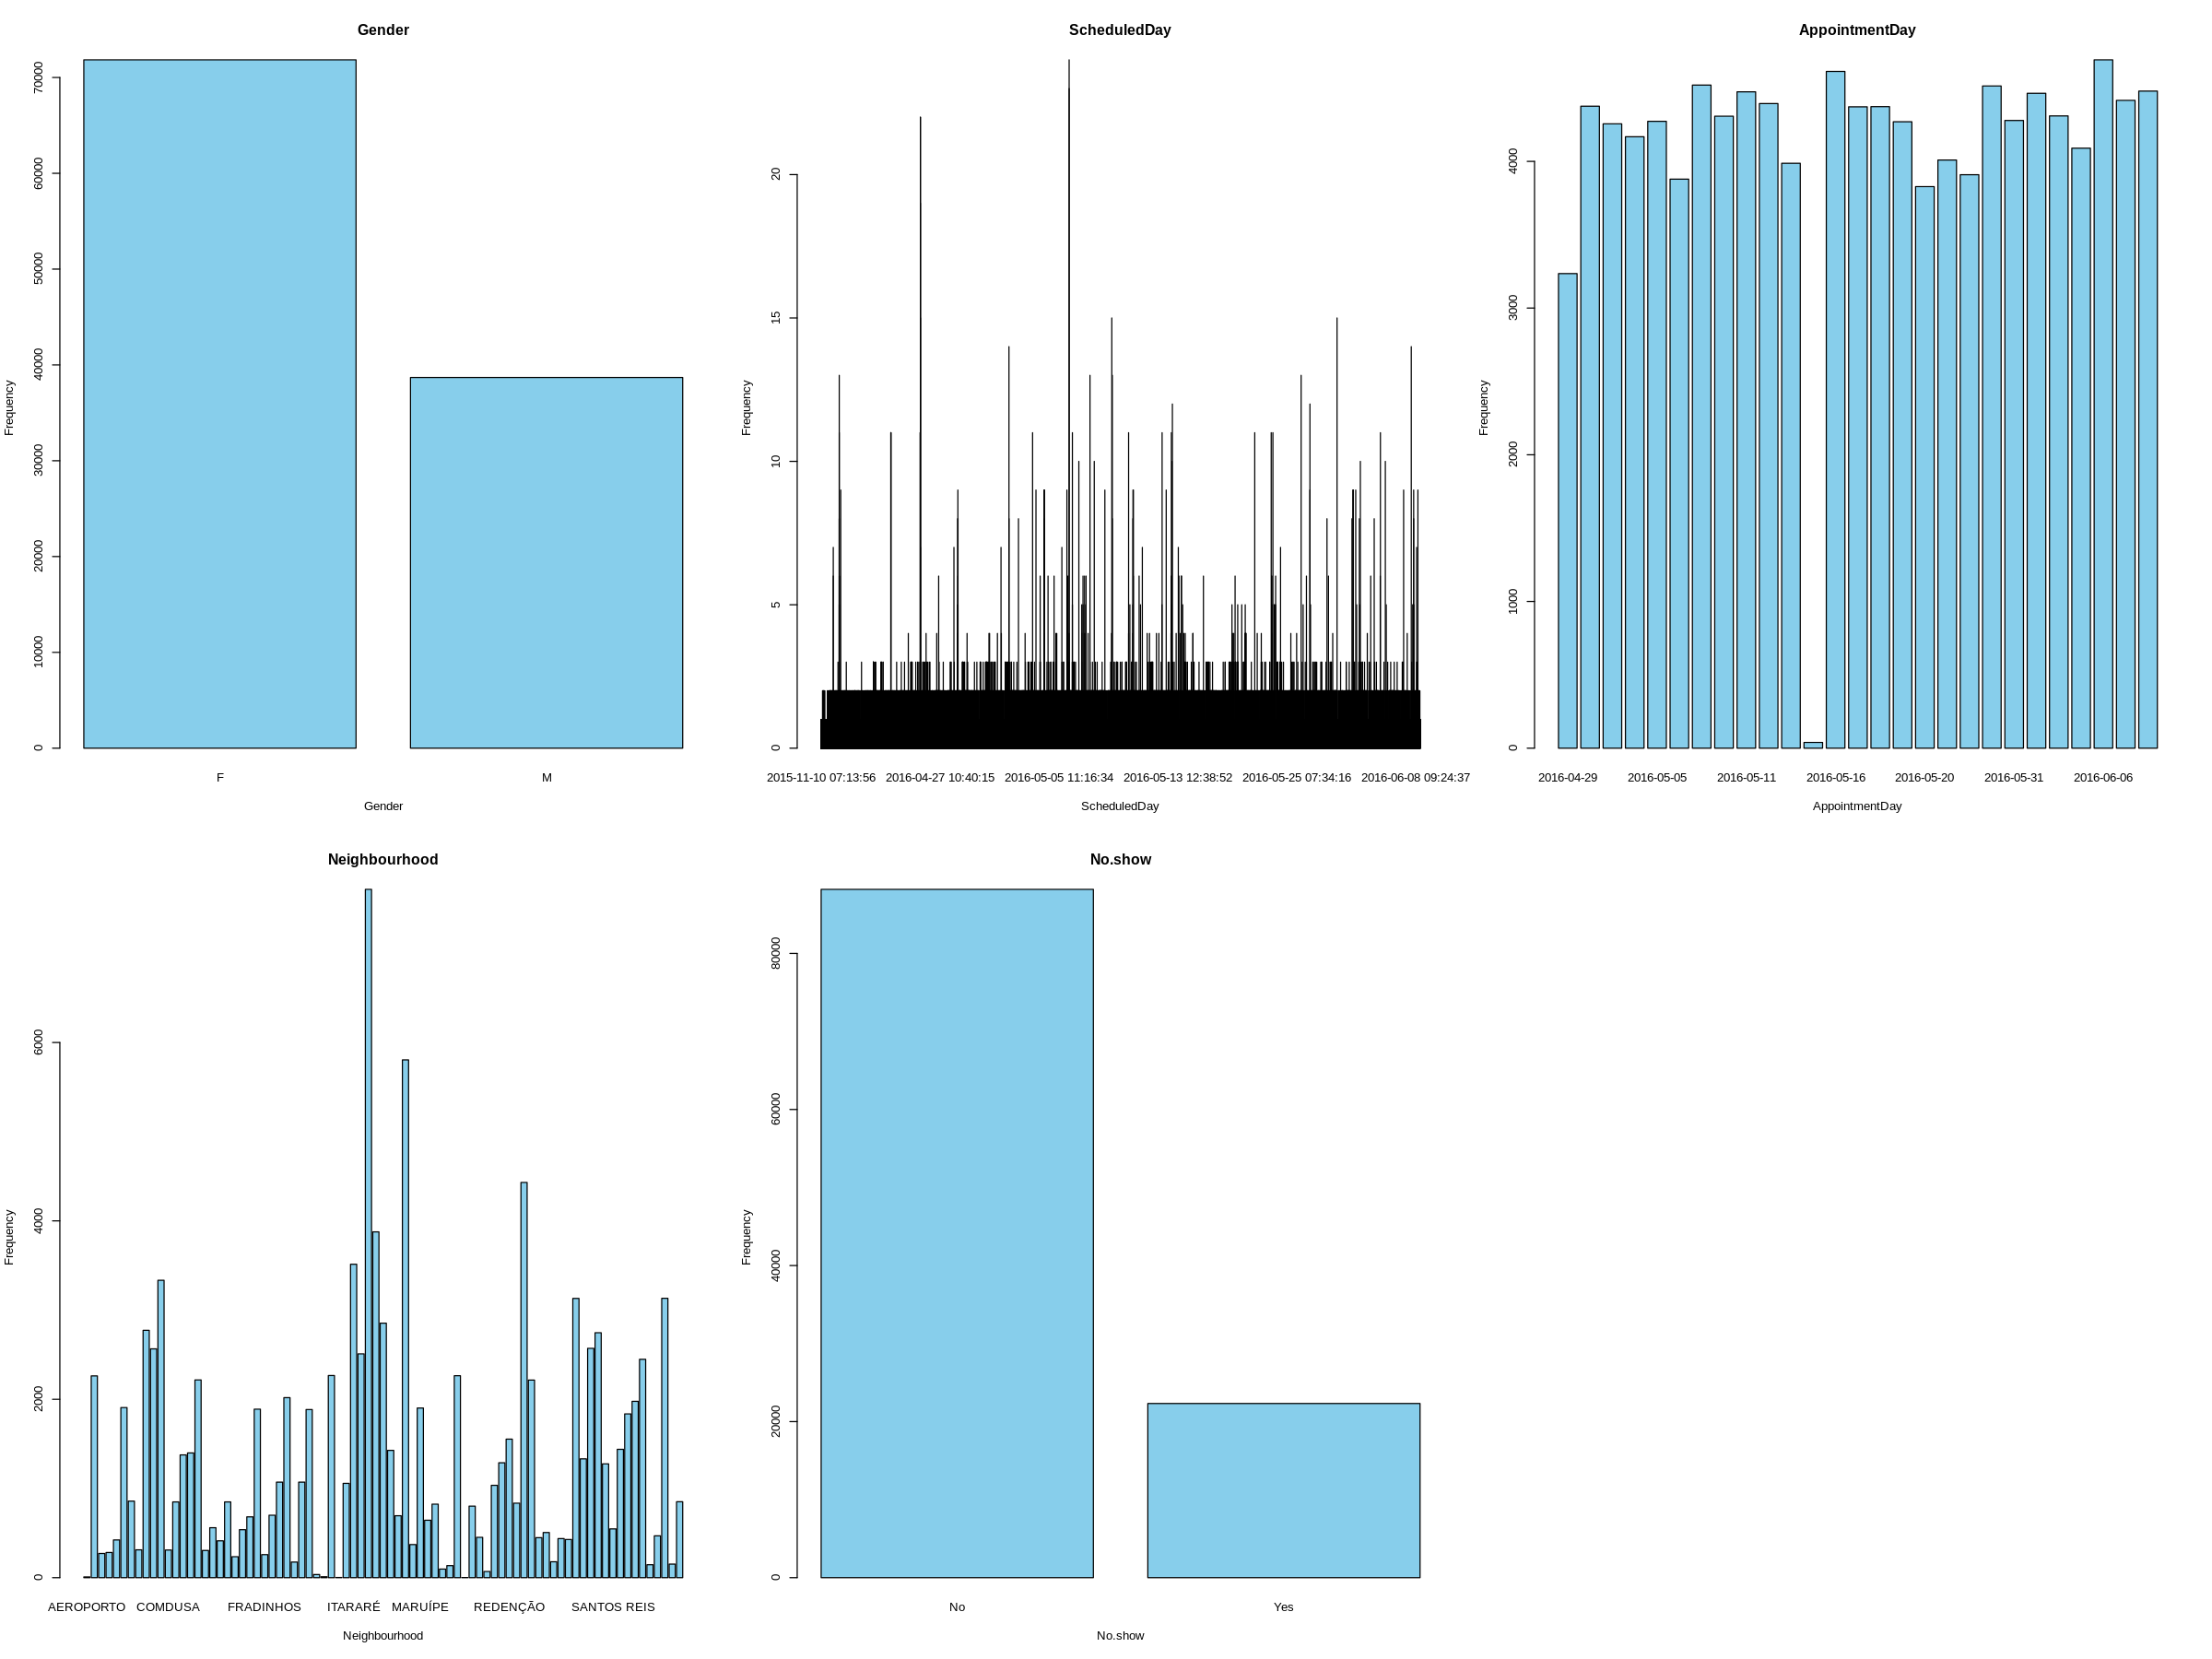

In [9]:
options(repr.plot.width = 20, repr.plot.height = 15)  # Set the width and height as desired

categorical_data <- data[, sapply(data, function(x) is.factor(x) | is.character(x) | is.POSIXct(x))]

# Plot bar charts for categorical variables with color
par(mfrow = c(ceiling(ncol(categorical_data) / 3), 3))
for (col in colnames(categorical_data)) {
  bar_data <- table(data[[col]])
  barplot(bar_data, main = col, xlab = col, ylab = "Frequency", col = "skyblue")  # Set the desired color
}

# Reset the plot settings
par(mfrow = c(1, 1))


## **A. Feature Engineering:**

### > 1. Prepare the data for downstream processes, e.g., dealing with missing values

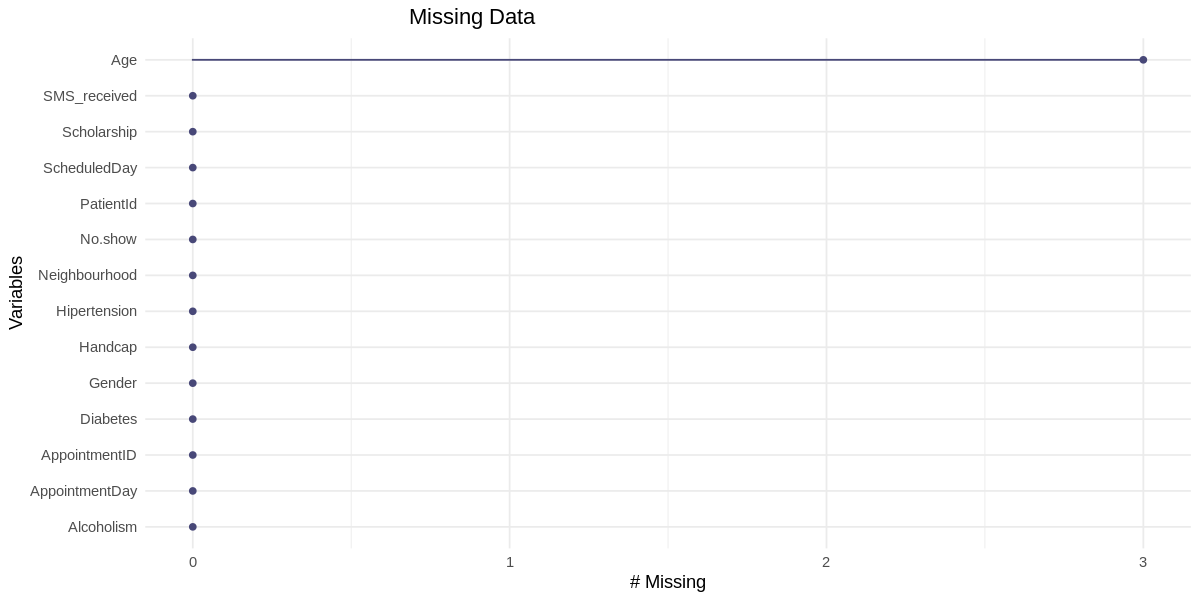

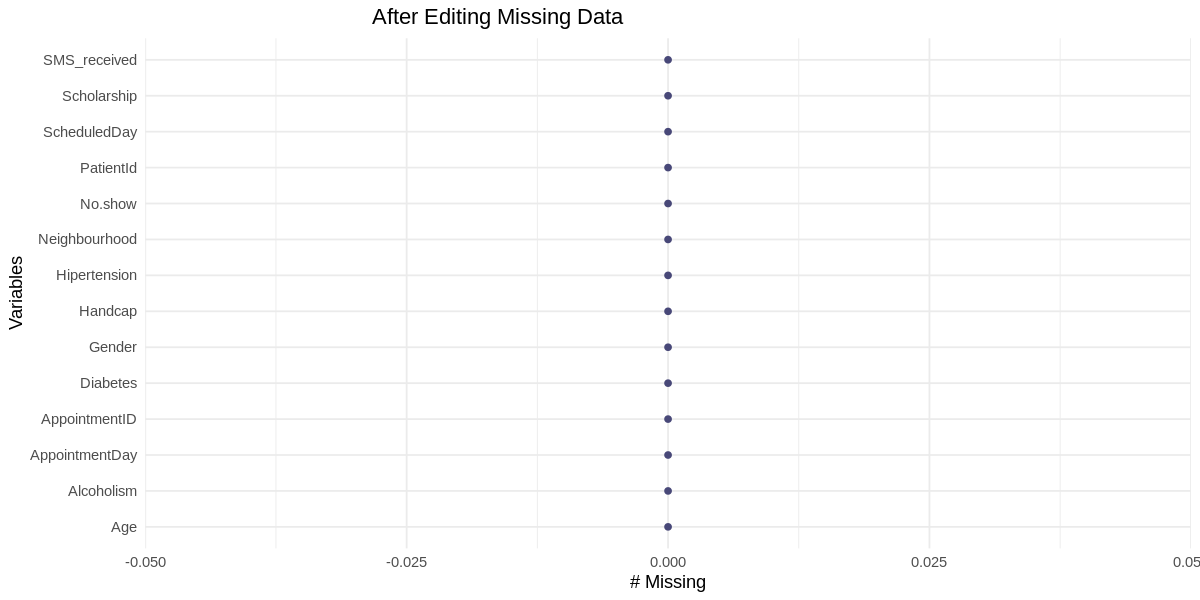

In [10]:
options(repr.plot.width = 10, repr.plot.height = 5)  # Set the width and height as desired

# Visualize missing values
gg_miss_var(data) +labs(title = "                                            Missing Data")

# Filter and Delete the records with null values
null_records <- data[is.na(data$Age),]
data <- data[!is.na(data$Age),]

# Check the updates
gg_miss_var(data)+labs(title = "                                      After Editing Missing Data")

In [11]:
# Check for duplicate records
duplicate_records <- data[duplicated(data), ]
cat("Sumation of Duplicates Rows: " , nrow(duplicate_records))

Sumation of Duplicates Rows:  0

### > 2. Initialize a function to plot all features within the dataset to visualize for outliers

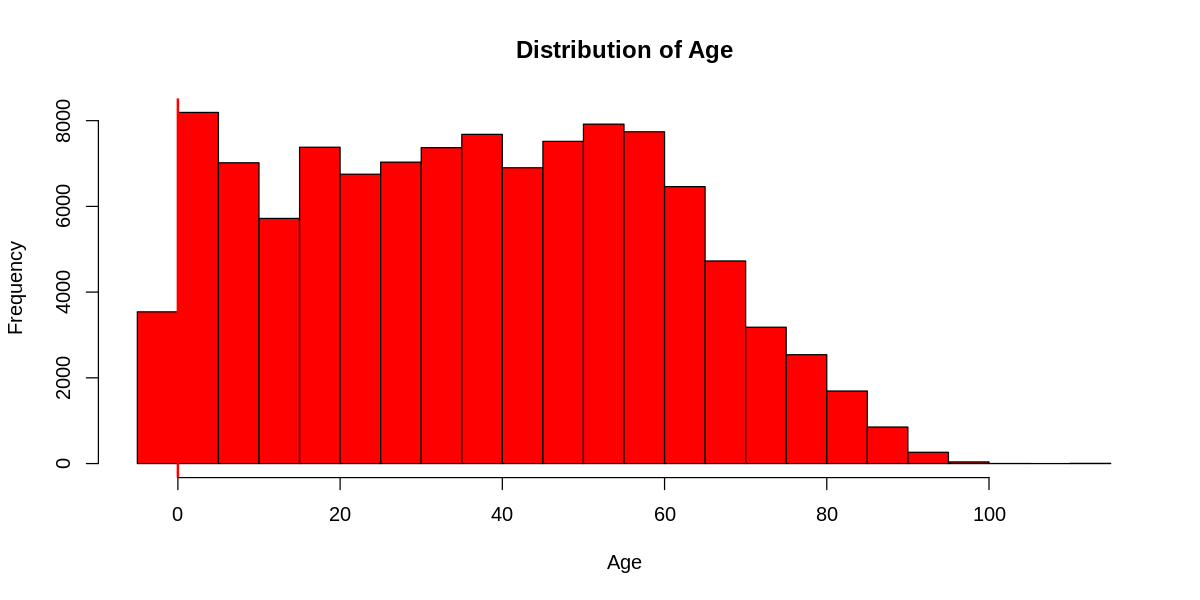

In [12]:
# Visualize the distribution of Age using a histogram
options(repr.plot.width = 10, repr.plot.height = 5)  # Set the width and height as desired

hist(data$Age, breaks = 25, col = "red", main = "Distribution of Age", xlab = "Age",)
abline(v = 0, col = "red", lwd = 2)

In [13]:
# Filter the dataset to include only numeric columns
numeric_data <- data[, sapply(data, is.numeric)]
#pairs(numeric_data, pch = 19)

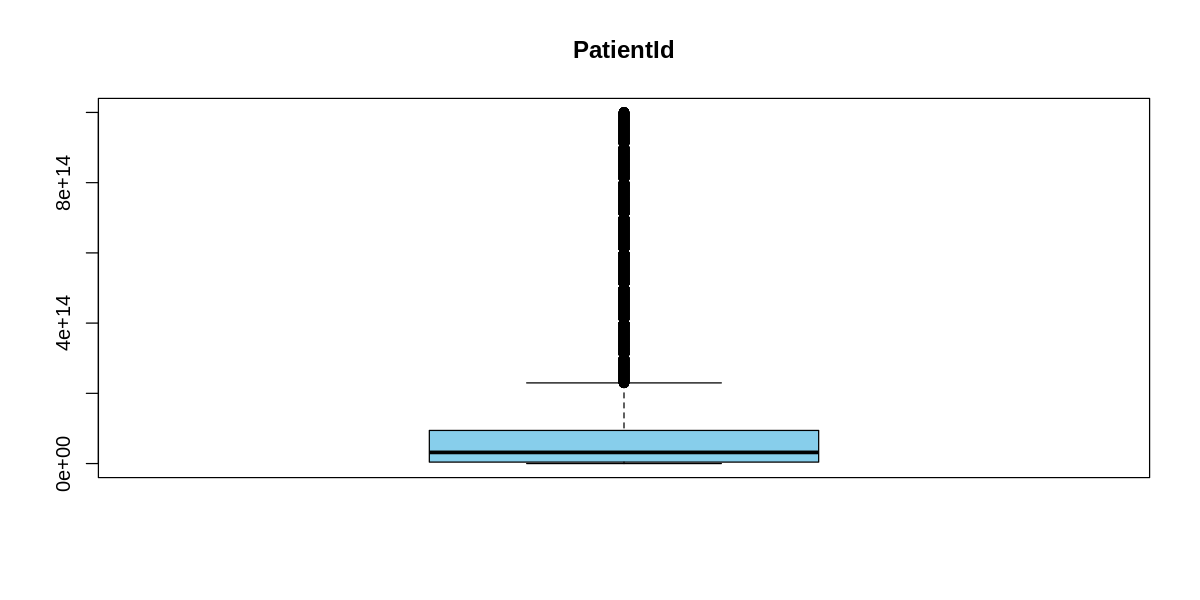

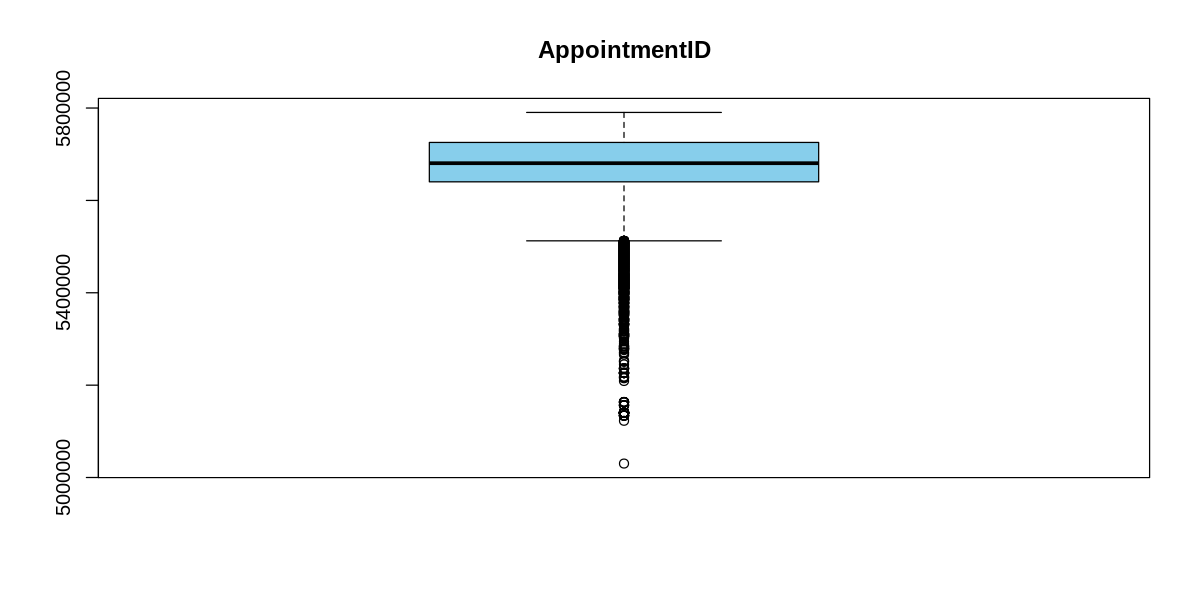

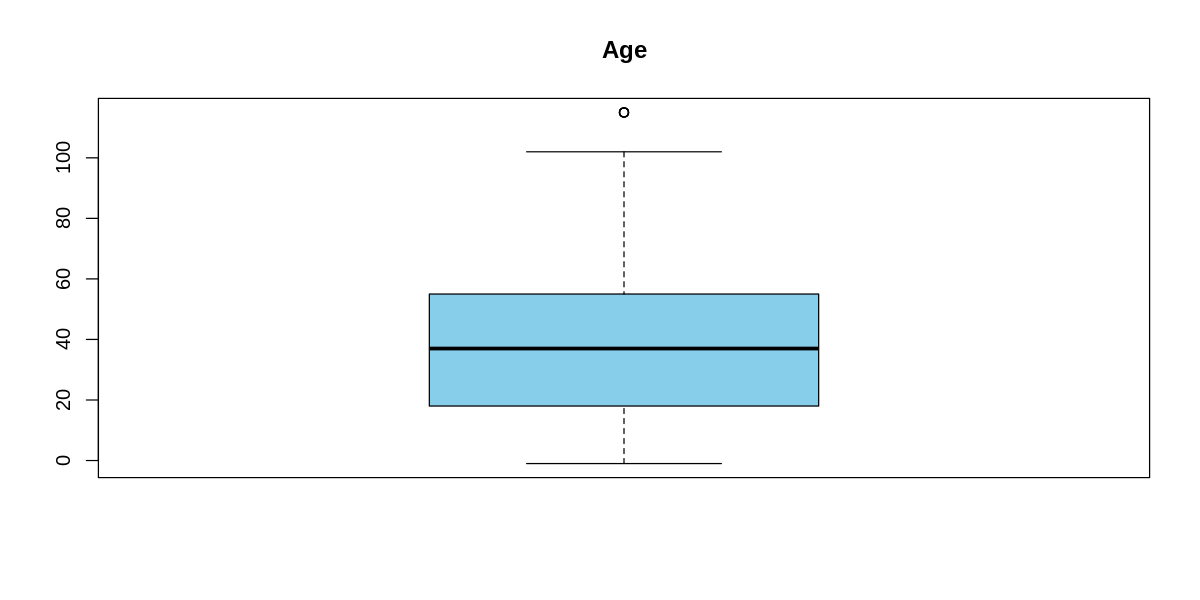

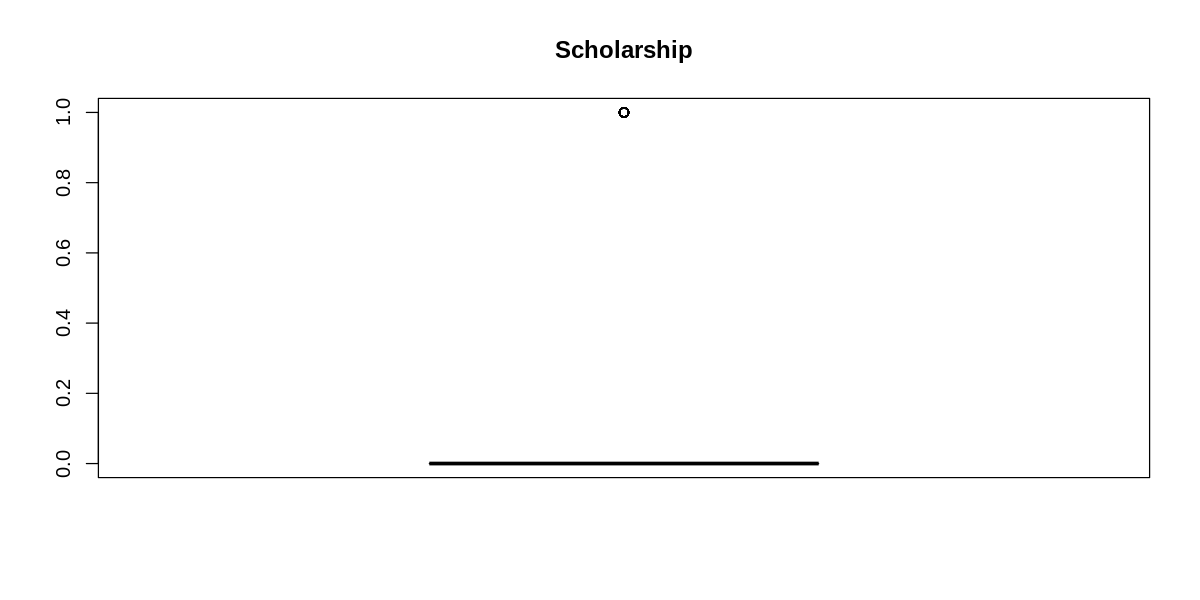

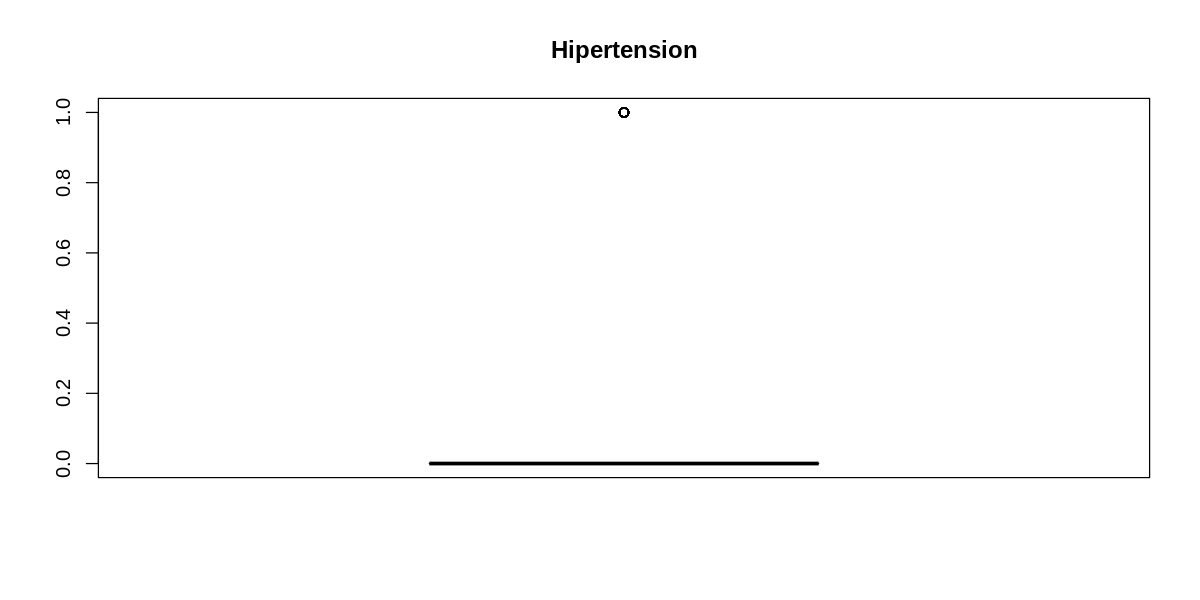

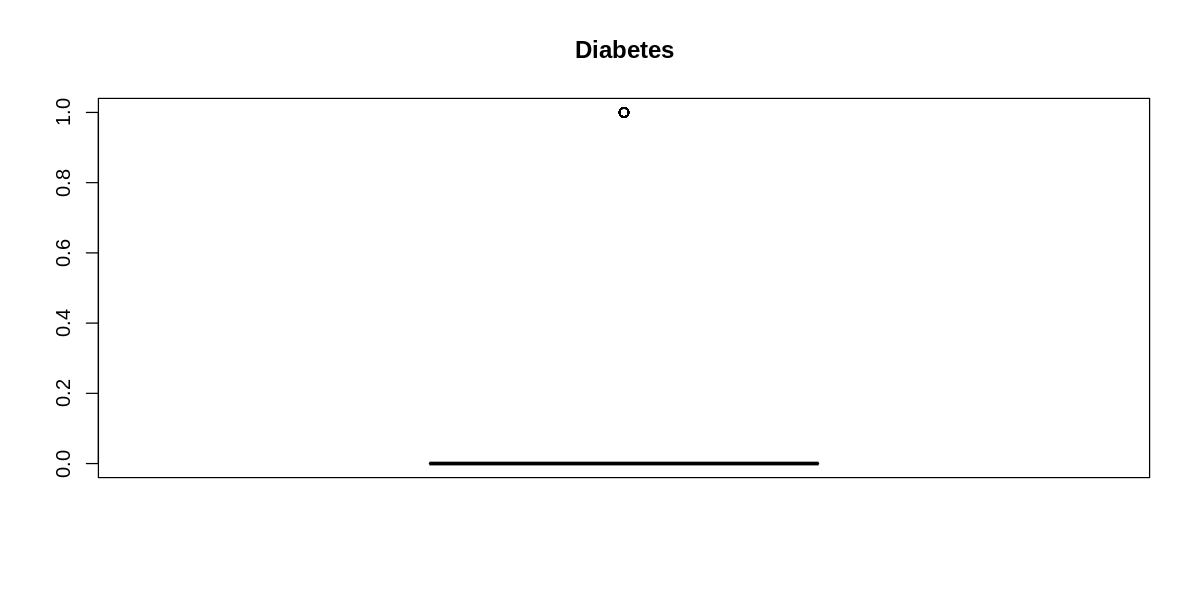

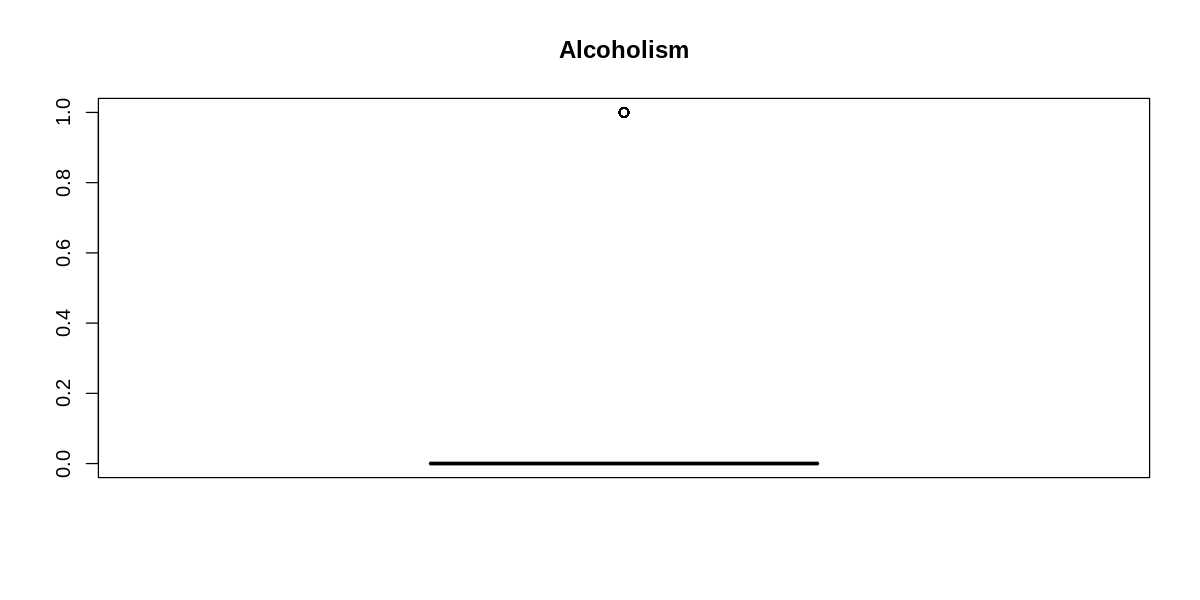

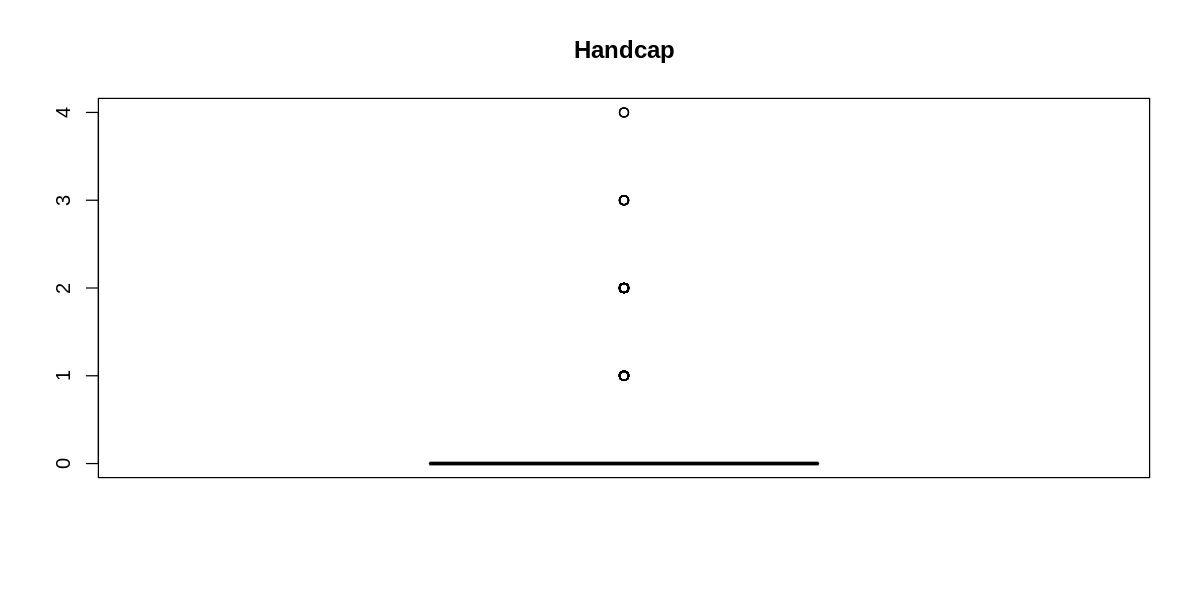

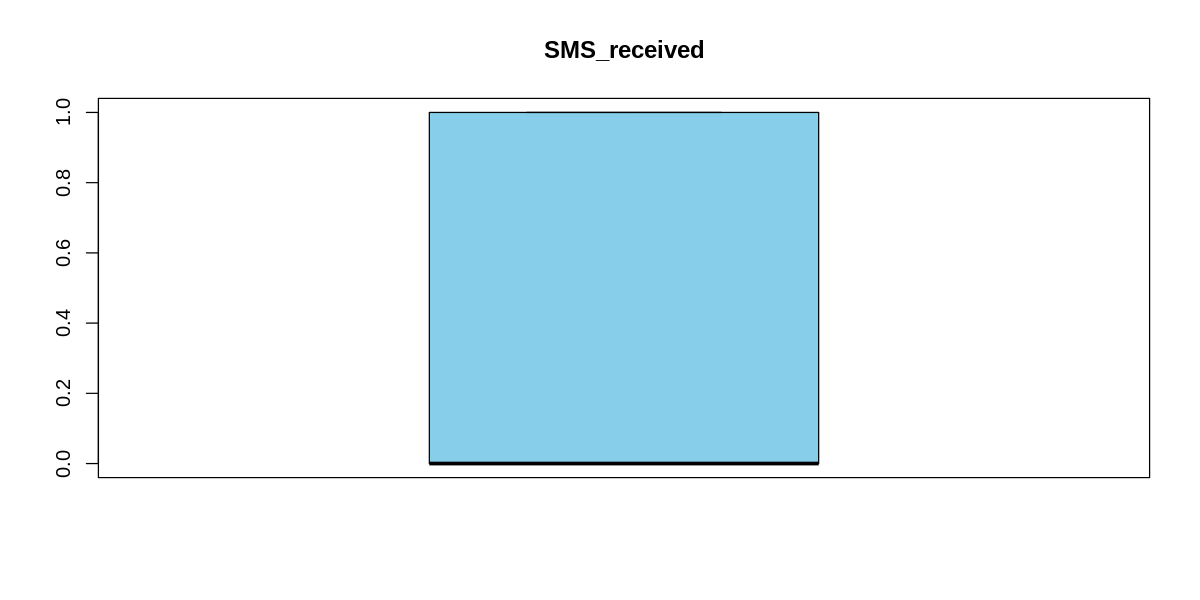

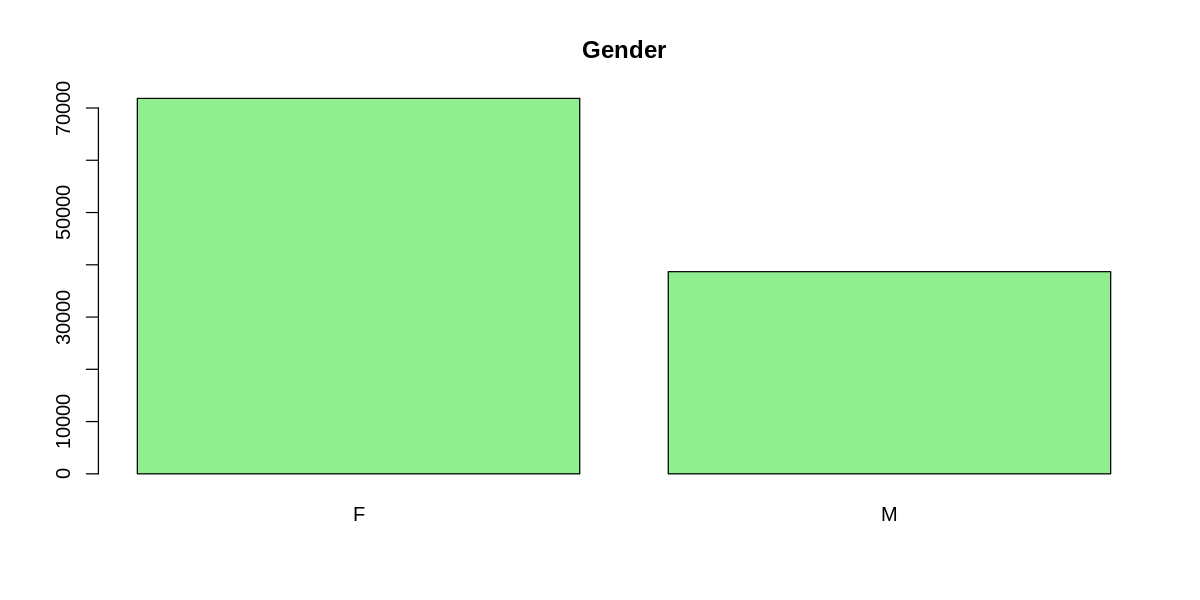

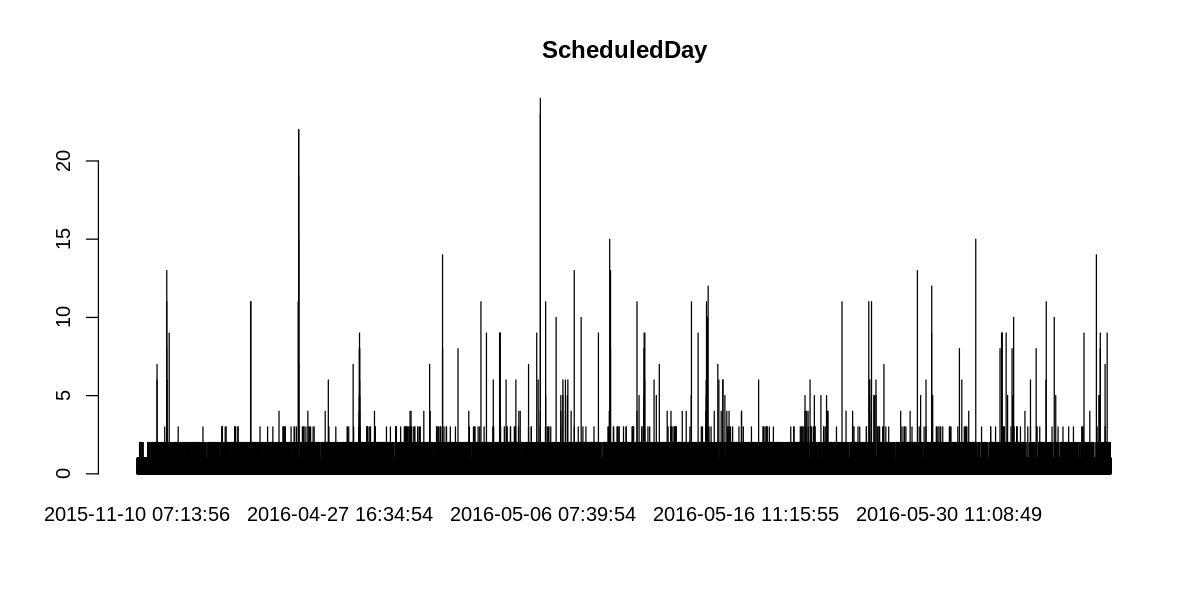

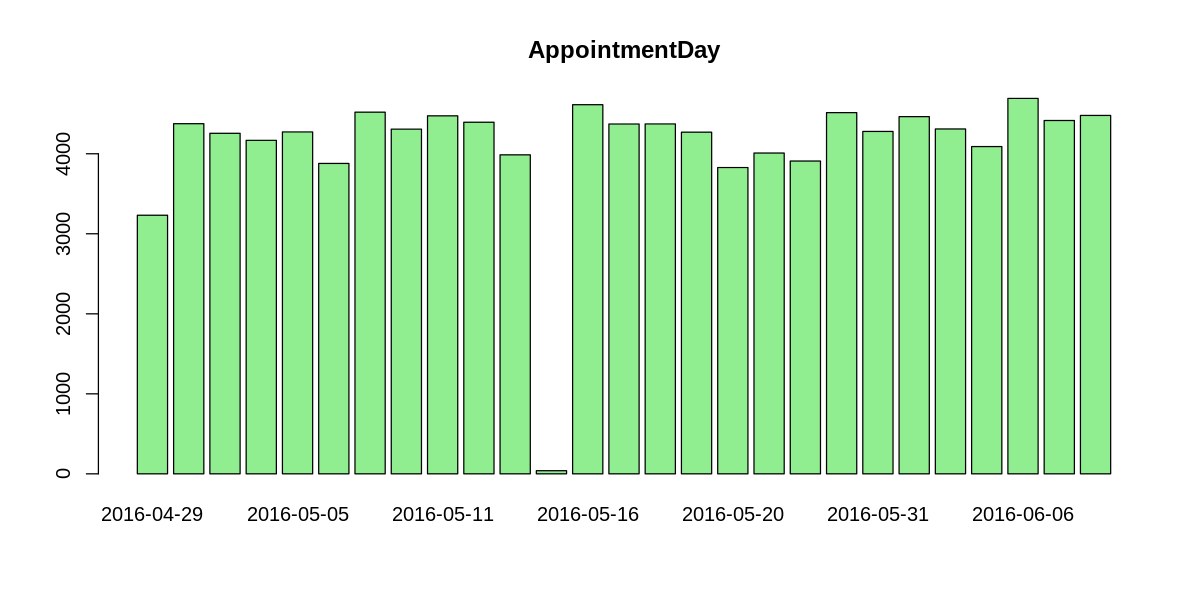

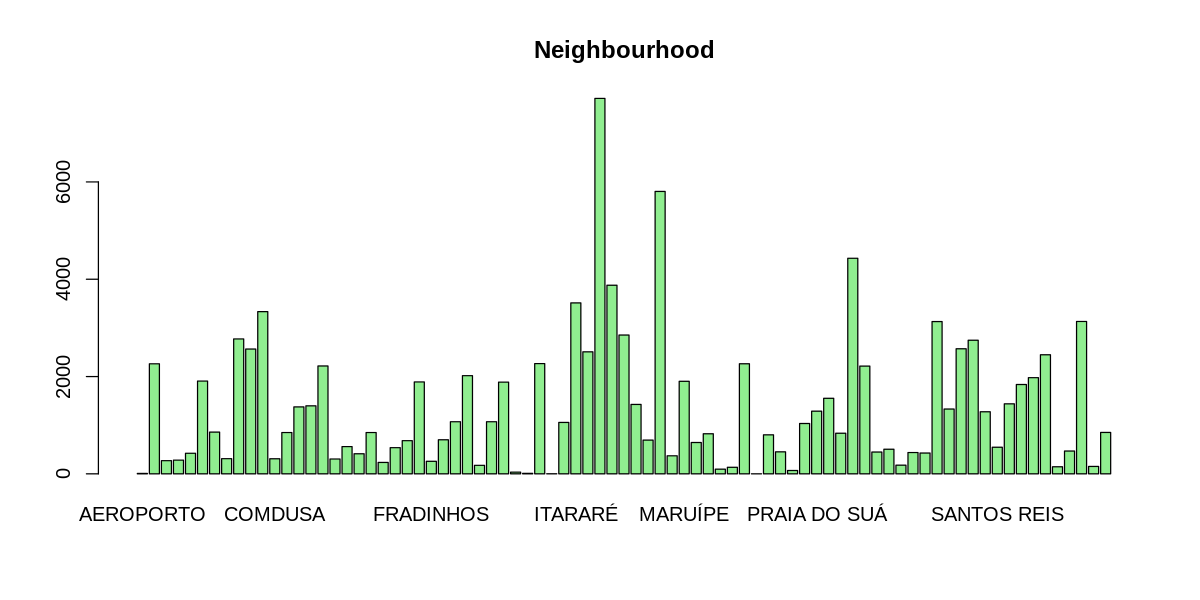

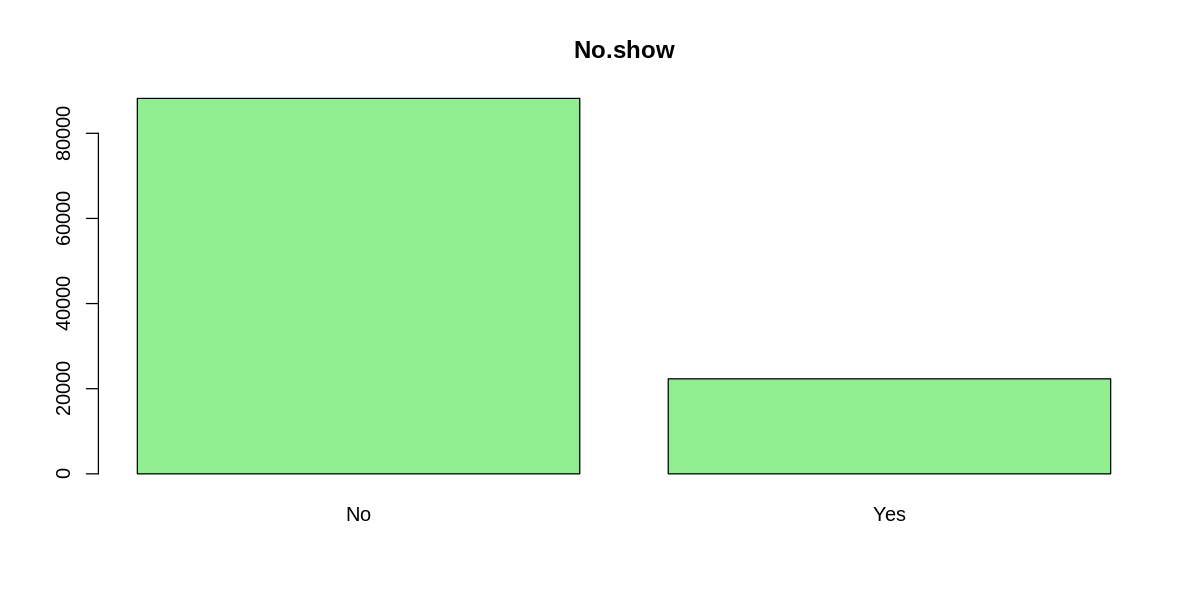

In [14]:
plot_outliers <- function(data) {

  # Select numeric columns
  numeric_cols <- sapply(data, is.numeric)
  numeric_data <- data[, numeric_cols]

  # Select categorical columns
  categorical_cols <- !numeric_cols
  categorical_data <- data[, categorical_cols]

  # Plot numeric features
  for (col in names(numeric_data)) {
    boxplot(data[[col]], main = col, col = "skyblue")
  }

  # Plot categorical features
  for (col in names(categorical_data)) {
    barplot(table(data[[col]]), main = col, col = "lightgreen")
  }
}
plot_outliers(data)

### > 3. Count the frequency of negative Age feature observations, and remove them

Frequency of negative age observations: 1 
Frequency of negative age observations after removal: 0 


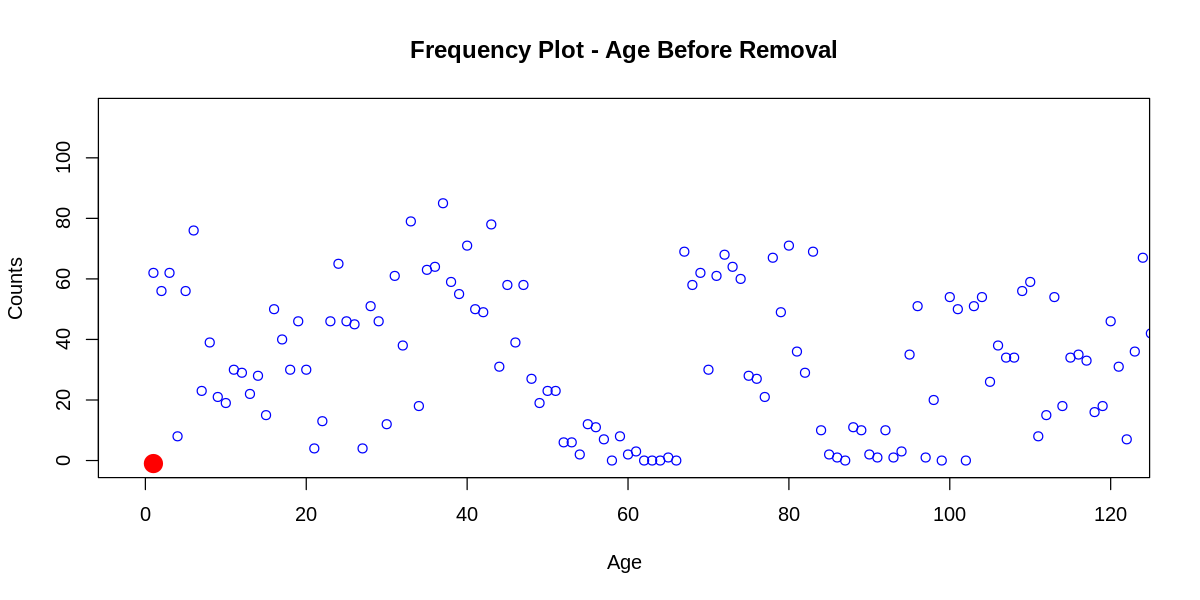

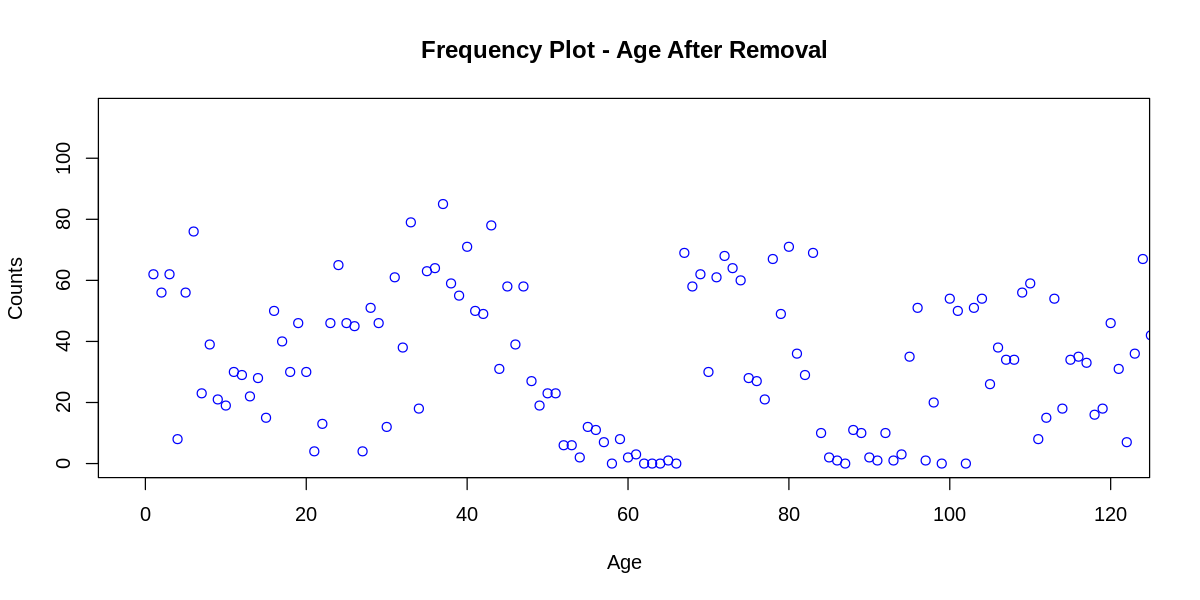

In [15]:
# Print the frequency before removal
options(repr.plot.width = 10, repr.plot.height = 5)  # Set the width and height as desired

negative_age_freq <- sum(data$Age < 0)

cat("Frequency of negative age observations:", negative_age_freq, "\n")
plot(data$Age, xlab = "Age", ylab = "Counts", main = "Frequency Plot - Age Before Removal", xlim = c(-1, 120), col = "blue")
points(data$Age[data$Age == -1], col = "red", pch = 19, cex = 2)

# Verify the removal
negative_age_freq <- sum(data$Age < 0)

# Remove negative age observations
data <- data[data$Age >= 0, ]

# Print the frequency after removal
updated_negative_age_freq <- sum(data$Age < 0)
cat("Frequency of negative age observations after removal:", updated_negative_age_freq, "\n")
plot(data$Age, xlab = "Age", ylab = "Counts", main = "Frequency Plot - Age After Removal", xlim = c(-1, 120), col = "blue")
points(data$Age[data$Age == -1], col = "red", pch = 19, cex = 2)


### > 4. The values within AwaitingTime are negative, transform them into positive values

In [16]:
#create AwaitingTime feature and Transform negative values into positive values
data$AwaitingTime <- abs(data$AppointmentDay-data$ScheduledDay)
View(data)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,AwaitingTime
,<dbl>,<int>,<chr>,<dttm>,<dttm>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<drtn>
1,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18.635556 hours
2,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16.140833 hours
3,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16.317778 hours
4,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17.491944 hours
5,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16.123056 hours
6,9.598510e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,39.385833 hours
7,7.336880e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,32.913333 hours
8,3.449830e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,32.333889 hours
9,5.639470e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,8.037778 hours


In [17]:
negative_count <- sum(data$AwaitingTime < 0)#count number of negative values after converting them to positive
negative_count

[1] 0

### > 5. Encode the string categorical values into an integer code


In [18]:
#drop PatientId ,AppointmentID
data <- data[, !(names(data) %in% c("PatientId", "AppointmentID","ScheduledYear","ScheduledMonth"))]

In [19]:
# Subset the data to select only character features
character_features <- data[, sapply(data, is.character)]

# Print the summary statistics of character features
str(character_features)

'data.frame':	110523 obs. of  3 variables:
 $ Gender       : chr  "F" "M" "F" "F" ...
 $ Neighbourhood: chr  "JARDIM DA PENHA" "JARDIM DA PENHA" "MATA DA PRAIA" "PONTAL DE CAMBURI" ...
 $ No.show      : chr  "No" "No" "No" "No" ...


In [20]:
#Encode string categorical values into integer codes
 encoded_data <-data.frame (data)

In [21]:
encoded_data$Gender <- ifelse(encoded_data$Gender == "F", 1, 0)
encoded_data$No.show <- ifelse(encoded_data$No.show == "Yes", 1, 0)
encoded_data$Neighbourhood <- as.integer(factor(encoded_data$Neighbourhood))

### > 6. Separate the date features into date components

In [22]:
# Extract date components
encoded_data$ScheduledYear <- year(encoded_data$ScheduledDay)
encoded_data$ScheduledMonth <- month(encoded_data$ScheduledDay)
encoded_data$ScheduledDayOfMonth <- day(encoded_data$ScheduledDay)
encoded_data$ScheduledDayOfWeek <- wday(encoded_data$ScheduledDay)

encoded_data$AppointmentYear <- year(encoded_data$AppointmentDay)
encoded_data$AppointmentMonth <- month(encoded_data$AppointmentDay)
encoded_data$AppointmentDayOfMonth <- day(encoded_data$AppointmentDay)
encoded_data$AppointmentDayOfWeek <- wday(encoded_data$AppointmentDay)


# View the updated encoded_dataset
View(encoded_data)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,⋯,No.show,AwaitingTime,ScheduledYear,ScheduledMonth,ScheduledDayOfMonth,ScheduledDayOfWeek,AppointmentYear,AppointmentMonth,AppointmentDayOfMonth,AppointmentDayOfWeek
,<dbl>,<dttm>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<drtn>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,2016-04-29 18:38:08,2016-04-29,62,40,0,1,0,0,0,⋯,0,18.635556 hours,2016,4,29,6,2016,4,29,6
2,0,2016-04-29 16:08:27,2016-04-29,56,40,0,0,0,0,0,⋯,0,16.140833 hours,2016,4,29,6,2016,4,29,6
3,1,2016-04-29 16:19:04,2016-04-29,62,47,0,0,0,0,0,⋯,0,16.317778 hours,2016,4,29,6,2016,4,29,6
4,1,2016-04-29 17:29:31,2016-04-29,8,55,0,0,0,0,0,⋯,0,17.491944 hours,2016,4,29,6,2016,4,29,6
5,1,2016-04-29 16:07:23,2016-04-29,56,40,0,1,1,0,0,⋯,0,16.123056 hours,2016,4,29,6,2016,4,29,6
6,1,2016-04-27 08:36:51,2016-04-29,76,59,0,1,0,0,0,⋯,0,39.385833 hours,2016,4,27,4,2016,4,29,6
7,1,2016-04-27 15:05:12,2016-04-29,23,26,0,0,0,0,0,⋯,1,32.913333 hours,2016,4,27,4,2016,4,29,6
8,1,2016-04-27 15:39:58,2016-04-29,39,26,0,0,0,0,0,⋯,1,32.333889 hours,2016,4,27,4,2016,4,29,6
9,1,2016-04-29 08:02:16,2016-04-29,21,2,0,0,0,0,0,⋯,0,8.037778 hours,2016,4,29,6,2016,4,29,6


### > 7. Rescale the age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score standardization) function# Select numeric columns


In [23]:
#Use the scale() function to standardize
encoded_data$Age  <- (encoded_data$Age - min(encoded_data$Age)) / (max(encoded_data$Age) - min(encoded_data$Age))
str(encoded_data)

'data.frame':	110523 obs. of  21 variables:
 $ Gender               : num  1 0 1 1 1 1 1 1 1 1 ...
 $ ScheduledDay         : POSIXct, format: "2016-04-29 18:38:08" "2016-04-29 16:08:27" ...
 $ AppointmentDay       : POSIXct, format: "2016-04-29" "2016-04-29" ...
 $ Age                  : num  0.5391 0.487 0.5391 0.0696 0.487 ...
 $ Neighbourhood        : int  40 40 47 55 40 59 26 26 2 13 ...
 $ Scholarship          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hipertension         : int  1 0 0 0 1 1 0 0 0 0 ...
 $ Diabetes             : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show              : num  0 0 0 0 0 0 1 1 0 0 ...
 $ AwaitingTime         : 'difftime' num  18.6355555555556 16.1408333333333 16.3177777777778 17.4919444444444 ...
  ..- attr(*, "units")= chr "hours"
 $ ScheduledYear        : num  2016 2016 2016 2016 2016 ...
 $ Schedul

### > 8. Conduct variability comparison between features using a correlation matrix & drop correlated features

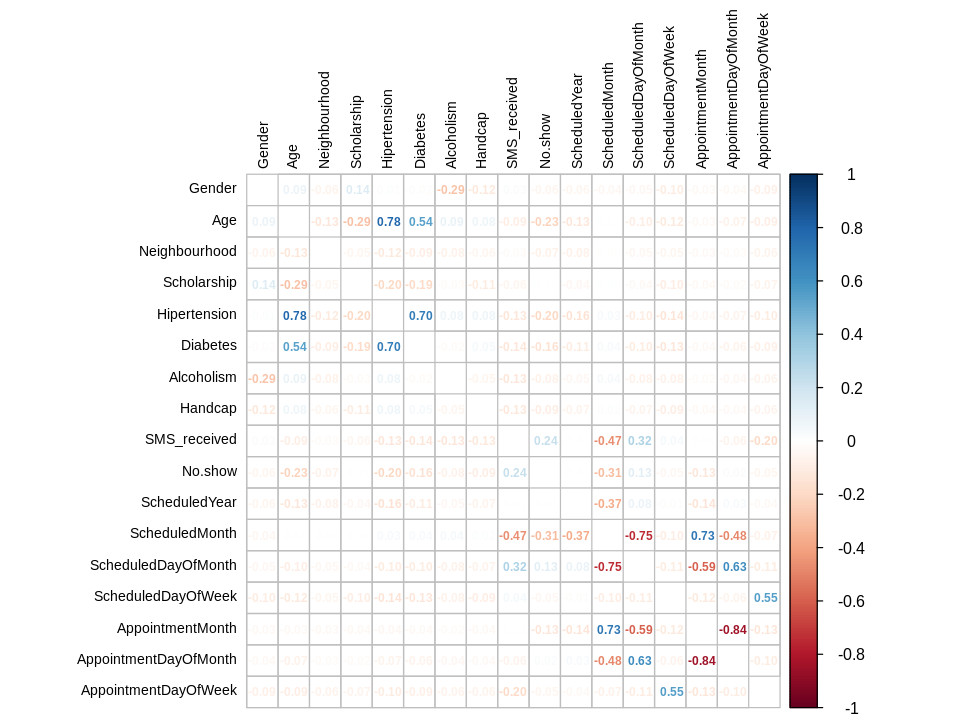

In [24]:
# Remove the "AppointmentYear" column if it has constant values = 2016)
options(repr.plot.width = 8, repr.plot.height = 6)  # Set the width and height as desired

if (length(unique(encoded_data$AppointmentYear)) == 1) {
  encoded_data <- encoded_data[, !colnames(encoded_data) %in% "AppointmentYear"]
}


# Select only the numeric columns for correlation calculation
numeric_data <- encoded_data[, sapply(encoded_data, is.numeric)]

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data)

# Plot the correlation matrix
corrplot(cor(correlation_matrix), diag = FALSE, method = 'number',tl.cex = 0.7, tl.col = "black", cl.ratio = 0.2, addrect = TRUE, number.cex = 0.6) # colorful number

[1] "Hipertension"          "AppointmentMonth"      "AppointmentDayOfMonth"


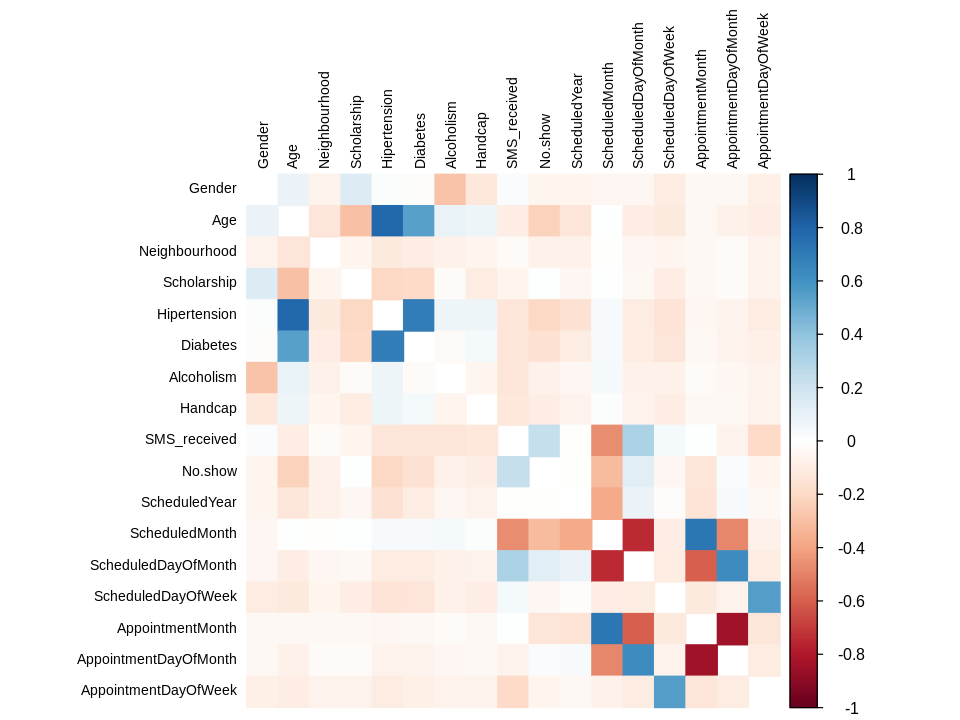

In [25]:
# Find highly correlated variables
options(repr.plot.width = 8, repr.plot.height = 6)  # Set the width and height as desired
highly_correlated <- which(abs(correlation_matrix) > 0.5 & upper.tri(correlation_matrix), arr.ind = TRUE)

# Get the column names of highly correlated variables
highly_correlated_features <- colnames(numeric_data)[unique(highly_correlated[, 2])]
print(highly_correlated_features)

# Remove highly correlated variables from the dataset
encoded_data <- encoded_data[, !colnames(encoded_data) %in% highly_correlated_features]

# Select only the numeric columns for correlation calculation
corrplot(cor(correlation_matrix), diag = FALSE, method = 'color',tl.cex = 0.7, tl.col = "black", cl.ratio = 0.2, addrect = TRUE, number.cex = 0.6) # colorful number

In [26]:
str(encoded_data)

'data.frame':	110523 obs. of  17 variables:
 $ Gender              : num  1 0 1 1 1 1 1 1 1 1 ...
 $ ScheduledDay        : POSIXct, format: "2016-04-29 18:38:08" "2016-04-29 16:08:27" ...
 $ AppointmentDay      : POSIXct, format: "2016-04-29" "2016-04-29" ...
 $ Age                 : num  0.5391 0.487 0.5391 0.0696 0.487 ...
 $ Neighbourhood       : int  40 40 47 55 40 59 26 26 2 13 ...
 $ Scholarship         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Diabetes            : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show             : num  0 0 0 0 0 0 1 1 0 0 ...
 $ AwaitingTime        : 'difftime' num  18.6355555555556 16.1408333333333 16.3177777777778 17.4919444444444 ...
  ..- attr(*, "units")= chr "hours"
 $ ScheduledYear       : num  2016 2016 2016 2016 2016 ...
 $ ScheduledMonth      : num  4 4 4 4 4 4 4 4 4 4 ...
 $ ScheduledDayOfMonth :

## **B. Model Development I**

In [27]:
encoded_data$No.show <- as.factor(encoded_data$No.show)
encoded_data$Neighbourhood <- as.factor(encoded_data$Neighbourhood)
encoded_data$Gender - as.factor(encoded_data$Gender)
str(encoded_data)

Warning message in Ops.factor(encoded_data$Gender, as.factor(encoded_data$Gender)):
“‘-’ not meaningful for factors”


[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [313] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [337] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [385] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [409] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [433] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [457] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [505] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [529] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [553] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [577] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [601] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [625] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [649] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [673] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [697] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [721] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [745] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [769] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [793] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [817] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [841] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [913] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [937] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [961] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1009] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1033] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1081] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1105] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1129] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1153] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1177] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [12

'data.frame':	110523 obs. of  17 variables:
 $ Gender              : num  1 0 1 1 1 1 1 1 1 1 ...
 $ ScheduledDay        : POSIXct, format: "2016-04-29 18:38:08" "2016-04-29 16:08:27" ...
 $ AppointmentDay      : POSIXct, format: "2016-04-29" "2016-04-29" ...
 $ Age                 : num  0.5391 0.487 0.5391 0.0696 0.487 ...
 $ Neighbourhood       : Factor w/ 81 levels "1","2","3","4",..: 40 40 47 55 40 59 26 26 2 13 ...
 $ Scholarship         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Diabetes            : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show             : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ AwaitingTime        : 'difftime' num  18.6355555555556 16.1408333333333 16.3177777777778 17.4919444444444 ...
  ..- attr(*, "units")= chr "hours"
 $ ScheduledYear       : num  2016 2016 2016 2016 2016 ...
 $ ScheduledMonth   

In [28]:
set.seed(42)
sample_split <- sample.split(Y = encoded_data$No.show, SplitRatio = 0.70)
train_set <- subset(encoded_data, sample_split == TRUE)
test_set <- subset(encoded_data, sample_split == FALSE)

# Get x_train and y_train
x_train <- train_set[, !colnames(train_set) %in% "No.show"]
y_train <- train_set$No.show

# Get x_test and y_test
x_test <- test_set[, !colnames(test_set) %in% "No.show"]
y_test <- test_set$No.show

# Print dimensions of train and test sets
cat("Dimensions of x_train: ", paste(dim(x_train), collapse = " x "), "\n")
cat("Dimensions of x_test: ", paste(dim(x_test), collapse = " x "), "\n")

Dimensions of x_train:  77366 x 16 
Dimensions of x_test:  33157 x 16 


###Decision Tree classifier

In [29]:
# Sample to ensure data values from all features are included
shuffle_index <- sample(1:nrow(encoded_data))
encoded_data <- encoded_data[shuffle_index, ]

# Check values present in the "No.show" column
table_result <- table(encoded_data$No.show)

# Show the table in a nice format
knitr::kable(table_result, caption = "Frequency of No.show values")




Table: Frequency of No.show values

|Var1 |  Freq|
|:----|-----:|
|0    | 88204|
|1    | 22319|

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 26299  6361
         1   162   335
                                          
               Accuracy : 0.8033          
                 95% CI : (0.7989, 0.8075)
    No Information Rate : 0.7981          
    P-Value [Acc > NIR] : 0.00899         
                                          
                  Kappa : 0.0671          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.99388         
            Specificity : 0.05003         
         Pos Pred Value : 0.80524         
         Neg Pred Value : 0.67404         
             Prevalence : 0.79805         
         Detection Rate : 0.79317         
   Detection Prevalence : 0.98501         
      Balanced Accuracy : 0.52195         
                                          
       'Positive' Class : 0               
                  

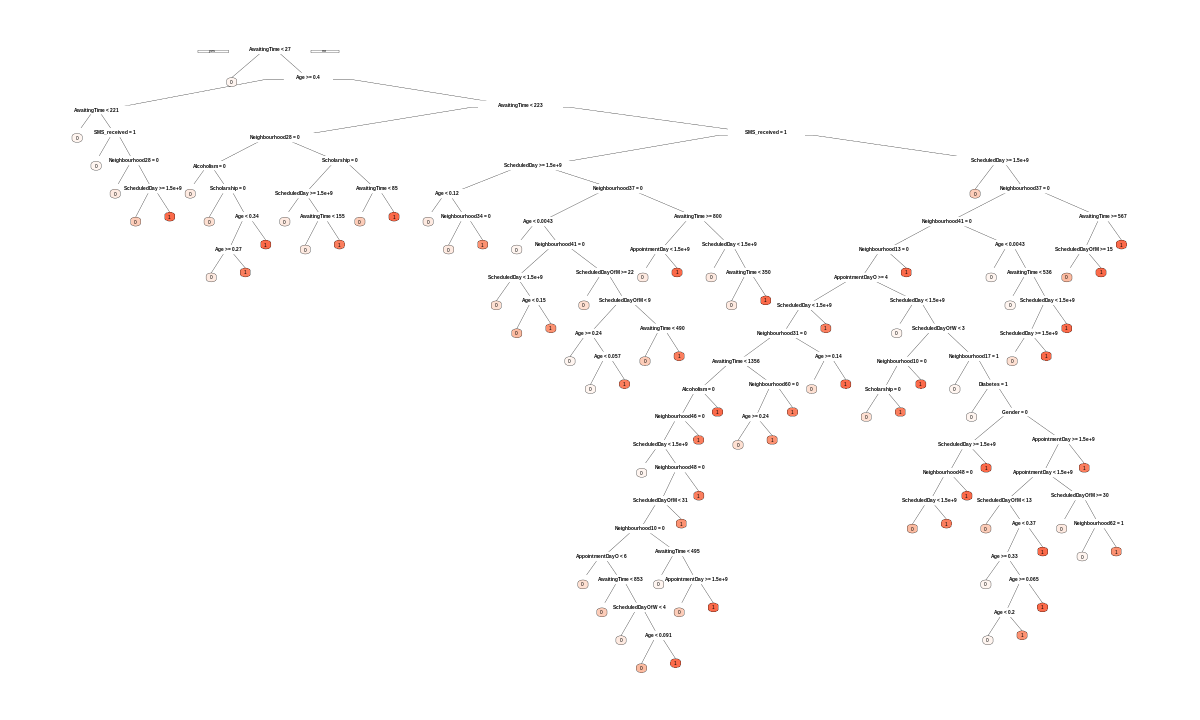

In [30]:
# Specify the cross-validation method
ctrl <- trainControl(method = "cv", number = 10)

# Fit a decision tree model and use k-fold CV to evaluate performance
dtree_fit_gini <- train(No.show ~ ., data = encoded_data, method = "rpart", parms = list(split = "gini"), trControl = ctrl, tuneLength = 10)

# Plot the decision tree
options(repr.plot.width = 10, repr.plot.height = 6)  # Set the width and height as desired
prp(dtree_fit_gini$finalModel, box.palette = "Reds", tweak = 1.2)

# Make predictions on the test set
test_pred_gini <- predict(dtree_fit_gini, newdata = test_set)

# Calculate accuracy
DT_Acc <- round(sum(test_pred_gini == y_test) / length(y_test) * 100, digits = 2)

# Generate the confusion matrix
confusion <- confusionMatrix(test_pred_gini, reference = y_test)

# Print the confusion matrix
print(confusion)


###Support Vector Machine

In [31]:
all.equal(colnames(x_train), colnames(x_test))

# Train the SVM model
svmfit <- svm(y_train ~ ., data = x_train, kernel = "linear")

print(svmfit)


# Predict on the test set
predictions <- predict(svmfit, newdata = x_test)

# Evaluate model performance
confusion_matrix <- table(predictions, y_test)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(confusion_matrix)
print(paste("Accuracy:", accuracy))

[1] TRUE


Call:
svm(formula = y_train ~ ., data = x_train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  37046

           y_test
predictions     0     1
          0 26461  6696
          1     0     0
[1] "Accuracy: 0.798051693458395"


In [42]:
confusionMatrix(data = as.factor(predictions), reference =as.factor(test_set$No.show))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 26461  6696
         1     0     0
                                          
               Accuracy : 0.7981          
                 95% CI : (0.7937, 0.8024)
    No Information Rate : 0.7981          
    P-Value [Acc > NIR] : 0.5033          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7981          
         Neg Pred Value :    NaN          
             Prevalence : 0.7981          
         Detection Rate : 0.7981          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                  

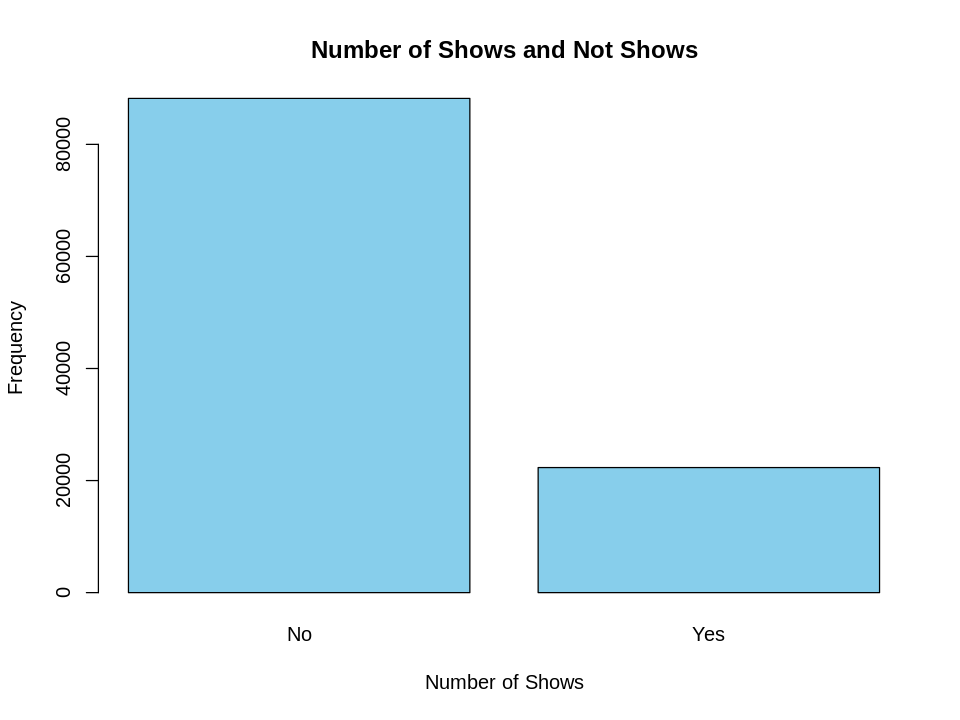

In [32]:
options(repr.plot.width = 8, repr.plot.height = 6)  # Set the width and height as desired

# Count the frequencies of zeros and ones in the "No.show" column
freq <- table(encoded_data$No.show)

# Create a bar plot of the frequencies
barplot(freq, names.arg = c("No", "Yes"), xlab = "Number of Shows", ylab = "Frequency", main = "Number of Shows and Not Shows", col = "skyblue")

## **C. Model Development II**

In [33]:
library(keras)
# Convert 'Neighbourhood' and 'Gender' to numeric
x_train <- apply(x_train, 2, as.numeric)
x_test <- apply(x_test, 2, as.numeric)

x_train <- scale(x_train)
x_test <- scale(x_test)

# Normalize the input data
max_value <- max(max(x_train), max(x_test))
train_x <- x_train / max_value
test_x <- x_test / max_value


# Convert the target variable to binary categorical encoded vectors
train_y <- to_categorical(y_train, num_classes = 2)
test_y <- to_categorical(y_test, num_classes = 2)

# Define the DNN model
model <- keras_model_sequential()
model %>%
  layer_dense(units = ncol(x_train), input_shape = c(ncol(x_train))) %>%
  layer_dropout(rate = 0.4) %>%
  layer_activation(activation = 'relu') %>%
  layer_dense(units = 2) %>%
  layer_activation(activation = 'sigmoid')

# Compile the model
model %>% compile(
  loss = 'binary_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

# Fit the model on the training dataset
history <- model %>% fit(
  x = train_x,
  y = train_y,
  epochs = 10,
  batch_size = 128,
  validation_data = list(test_x, test_y)
)

# Evaluate the model on the test dataset
loss_and_metrics <- model %>% evaluate(
  x = test_x,
  y = test_y
)
#print(loss_and_metrics)
test_m <- model %>% evaluate(test_x,test_y)
print(test_m)

Warning message in apply(x_train, 2, as.numeric):
“NAs introduced by coercion”
Warning message in apply(x_train, 2, as.numeric):
“NAs introduced by coercion”
Warning message in apply(x_train, 2, as.numeric):
“NAs introduced by coercion”
Warning message in apply(x_test, 2, as.numeric):
“NAs introduced by coercion”
Warning message in apply(x_test, 2, as.numeric):
“NAs introduced by coercion”
Warning message in apply(x_test, 2, as.numeric):
“NAs introduced by coercion”


     loss  accuracy 
      NaN 0.7980517 


## **D. Model Evaluation & Comparison**

### A

In [34]:
# Function to compute accuracy of decision tree classifier
compute_dt_accuracy <- function(train_data, test_data) {
  # Train decision tree classifier on training data
  dt_model <- rpart(No.show ~ ., data = train_data, method = "class")

  # Make predictions on test data
  predictions <- predict(dt_model, newdata = test_data, type = "class")

  # Evaluate model performance
  conf_matrix <- table(predictions, test_data$No.show)
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

  # Check for overfitting by comparing training and test accuracy
  train_predictions <- predict(dt_model, newdata = train_data, type = "class")
  train_conf_matrix <- table(train_predictions, train_data$No.show)
  train_accuracy <- sum(diag(train_conf_matrix)) / sum(train_conf_matrix)

  if (accuracy < train_accuracy) {
    overfitting <- TRUE
  } else {
    overfitting <- FALSE
  }

  result <- list(accuracy = accuracy, overfitting = overfitting)
  return(result)
}




# Compute accuracy of decision tree classifier on test data
dt_accuracy <- compute_dt_accuracy(train_set, test_set)
cat("Decision Tree Accuracy:", round(dt_accuracy$accuracy, 2))
cat("\nOverfitting:", dt_accuracy$overfitting)

Decision Tree Accuracy: 0.8
Overfitting: TRUE

In [35]:
# Define function to calculate model accuracy
model_accuracy <- function(model, test_data,train_data) {
  # Make predictions on test set
  pred_labels <- predict(model, newdata = test_data,type = "class")

  # Calculate confusion matrix and accuracy
  conf_matrix <- table(pred_labels, test_data$No.show)
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

  # Check for overfitting
  train_pred_labels <- predict(model, newdata = train_data,type = "class")
  train_conf_matrix <- table(train_pred_labels, train_data$No.show)
  train_accuracy <- sum(diag(train_conf_matrix)) / sum(train_conf_matrix)
  if (accuracy < train_accuracy) {
    overfitting <- TRUE
  } else {
    overfitting <- FALSE
  }

  # Return accuracy and overfitting status
  return(list(accuracy = accuracy, overfitting = overfitting))
}


In [36]:
model_accuracy(svmfit,test_set,train_set)

$accuracy
[1] 0.7980517

$overfitting
[1] TRUE

In [37]:
dtTuningGrid <- expand.grid(cp = seq(0.01, 0.5, by = 0.01))

# Tune the Decision Tree classifier using GridSearchCV
dtModel <- train(No.show ~ ., data = train_set, method = "rpart", tuneGrid = dtTuningGrid, trControl = trainControl(method = "cv", number = 5))

# Print the tuned hyperparameters and associated model accuracy
print(dtModel$bestTune)
print(dtModel$results$Accuracy)

    cp
50 0.5
 [1] 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
 [8] 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
[15] 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
[22] 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
[29] 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
[36] 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
[43] 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637 0.7980637
[50] 0.7980637


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Setting direction: controls < cases



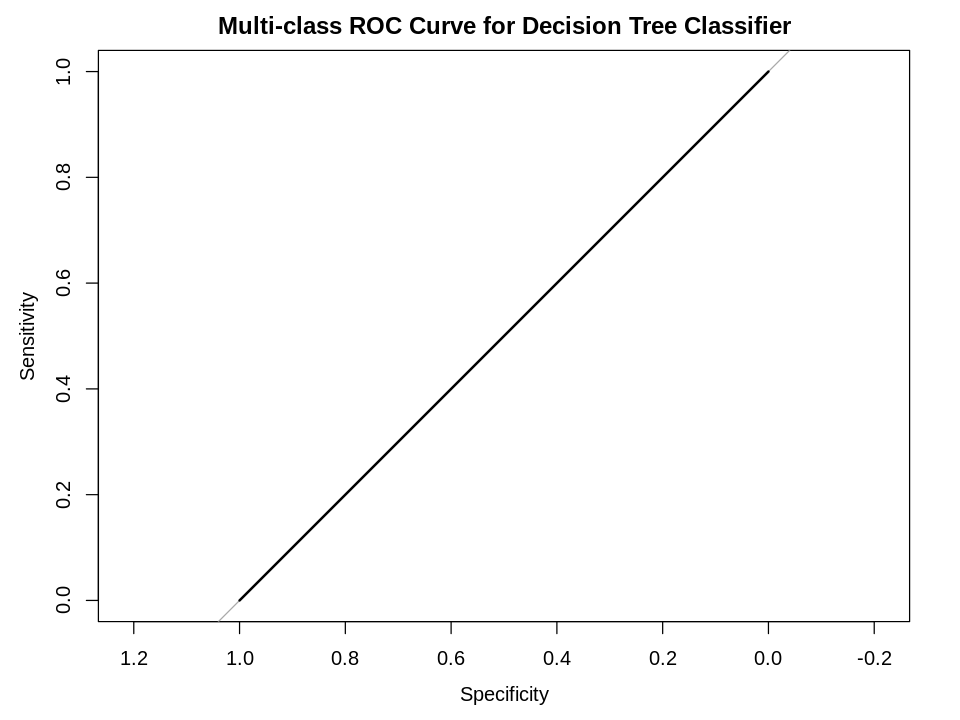

In [44]:
install.packages("pROC")   # Evaluate model performance
conf_matrix <- table(predictions, test_set$No.show)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Compute multi-class ROC analysis
roc_obj <- multiclass.roc(test_set$No.show, as.numeric(predictions == "Yes"))

# Plot multi-class ROC curve
plot(roc_obj$roc[[1]], main = "Multi-class ROC Curve for svm Classifier")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Setting direction: controls < cases



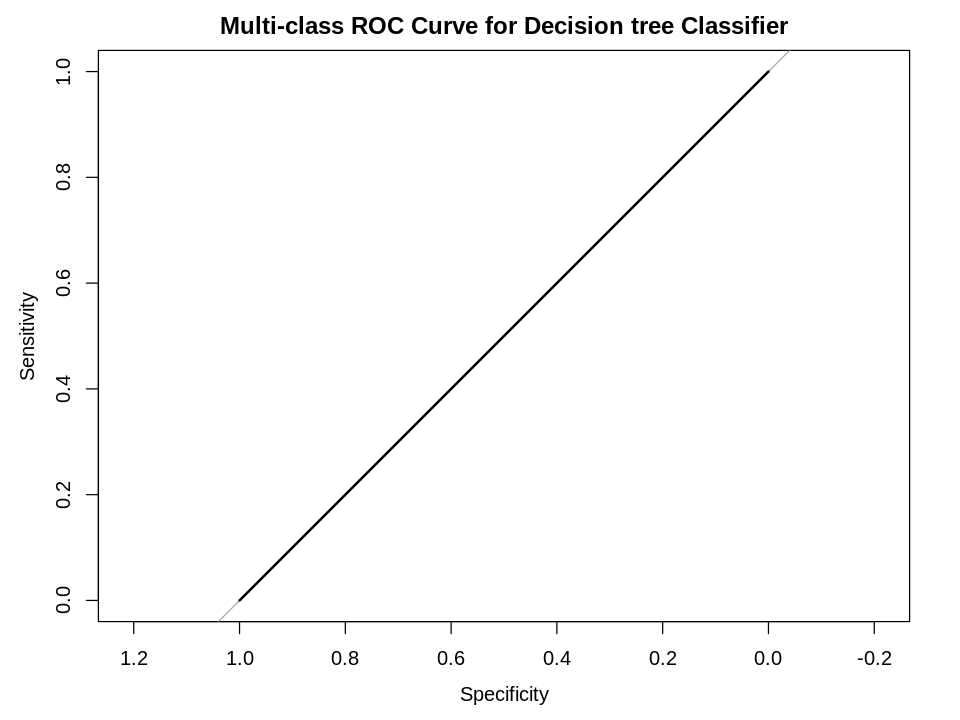

In [45]:
install.packages("pROC")   # Evaluate model performance
conf_matrix <- table(test_pred_gini, test_set$No.show)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Compute multi-class ROC analysis
roc_obj <- multiclass.roc(test_set$No.show, as.numeric(predictions == "Yes"))

# Plot multi-class ROC curve
plot(roc_obj$roc[[1]], main = "Multi-class ROC Curve for Decision tree Classifier")

In [ ]:
install.packages("kernlab")

library(caret)

# Define the parameter grid
svmTuningGrid <- expand.grid( C = c(0.1, 1, 10),kernel = c("linear", "radial"))

# Tune the SVM classifier using GridSearchCV
svmModel <- train(No.show ~ .,data = train_set, method = "svmRadial", tuneGrid = svmTuningGrid, trControl = trainControl(method = "cv", number = 5))

# Print the tuned hyperparameters and associated model accuracy
print(svmModel$bestTune)
print(svmModel$results$Accuracy)